In [1]:
#cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


In [2]:
from google.colab import files

uploaded = files.upload()

Saving usuarios_win_mac_lin.csv to usuarios_win_mac_lin.csv


In [3]:
df_users = pd.read_csv("usuarios_win_mac_lin.csv")
df_users.head()


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
# Separamos las variables
X = df_users.drop(columns=["clase"])
y = df_users["clase"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Clases únicas:", y.unique())


Shape X: (170, 4)
Shape y: (170,)
Clases únicas: [2 1 0]


In [5]:
# entrenamiento del modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (136, 4)  Test: (34, 4)


In [6]:
#modelo de regresion logistica multiclase
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("logreg", LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy en test:", acc)


Accuracy en test: 0.7058823529411765


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
#reporte de clasificacion y matriz
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       1.00      0.38      0.55         8
           2       0.60      1.00      0.75         9

    accuracy                           0.71        34
   macro avg       0.78      0.69      0.67        34
weighted avg       0.77      0.71      0.69        34

Matriz de confusión:
[[12  0  5]
 [ 4  3  1]
 [ 0  0  9]]


<Figure size 640x480 with 0 Axes>

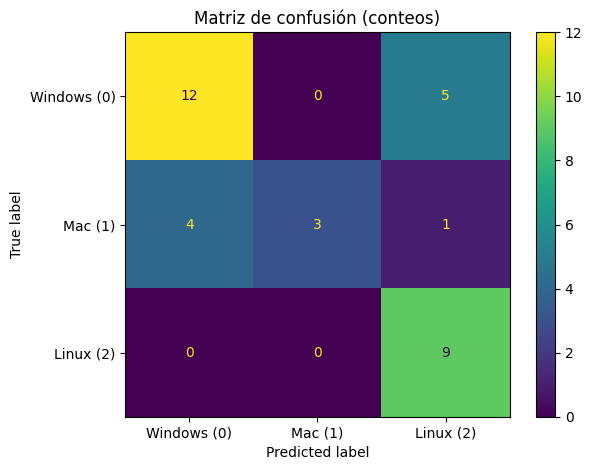

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
labels = [0, 1, 2]
label_names = ["Windows (0)", "Mac (1)", "Linux (2)"]

# --- Matriz de confusión en CONTEOS ---
plt.figure()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    labels=labels,
    display_labels=label_names
)
plt.title("Matriz de confusión (conteos)")
plt.grid(False)
plt.tight_layout()
plt.show()